# Simulate Random Game

<div class="alert alert-block alert-info">
<b>Imports:</b> Import all of the classes and useful functions for game initialization
</div>

In [1]:
from utils.game_map_class import GameMap
from utils.game_team_class import GameTeam
from utils.strategy_class import Strategy, RandomStrategy, RuleOfThumbStrategy
from utils.map_setup_functions import setGameBoardRandom, initializeFullRiskMap

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">
<b>Initialization:</b> Initialize the Game of Risk using the functions from map_setup_functions.py. Our team names are "red" and "blue", and they will randomly split the countries on the RISK map. Each territory will only start with 1 troop. In addition, we call the RandomStrategy subclass to tell each team that they will play using a RandomStrategy!
</div>


In [3]:
full_risk_map = initializeFullRiskMap()
team_names = ["red", "blue"]
team_strategies = [RuleOfThumbStrategy, RandomStrategy]
risk_map, teams = setGameBoardRandom(team_names, full_risk_map, team_strategies)
#risk_map, teams = setGameBoardRandom(team_names, full_risk_map, RandomStrategy)

<div class="alert alert-block alert-warning">
<b>Territories: </b> Let us see what our kind of territories our teams have 
</div>

In [4]:
teams[0].getTerritories()[0:5]

['Western Australia', 'Greenland', 'East Africa', 'Madagascar', 'Siberia']

<div class="alert alert-block alert-warning">
<b>Adding Troops: </b> What happens if we add a troop to the first teams first territory? We will see that the RISK Map updates that country with one more troop! 
</div>

In [5]:
#teams[0].addTroops(teams[0].getTerritories()[0], 1)
#print('{territory} now has {x} troops!'.format(territory = teams[0].getTerritories()[0], x = risk_map.getTroops(teams[0].getTerritories()[0])))

<div class="alert alert-block alert-warning">
    <b>Get Next Move: </b> Now, only one territory has more than 1 troop, so that will be the only territory that can make a next move (even in a random strategy!). This calls the strategy asking what move it should make. If getNextMove() returns nothing, that means that the territory is completely surrounded by its own team. Try adding troops to another country.
</div>

In [6]:
#teams[0].getStrategy().addTroopsTurn(3)
#teams[0].getNextMove()

<div class="alert alert-block alert-warning">
<b>Determine and Make Next Move: </b> This will call the strategies getNextMove() function and make that move (including the actual attack!)
</div>

In [7]:
#teams[0].determineAndMakeMove()

<div class="alert alert-block alert-warning">
<b>Play Turn: </b> This plays a complete turn (of potentailly multiple moves) according to a country's Strategy! 
</div>

In [8]:
#teams[0].playTurn()

<div class="alert alert-block alert-warning">
<b>Simulate Game: </b> This simulates a complete game between a Rule of Thumb Strategy and Random Strategy!
</div>

Adding 7 to Alberta!
('Alberta', 'Alaska')
Team red declares attack on Team blue from Alberta to Alaska
Attacking_dice:  [5, 3, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [6, 2, 1]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Alaska', 'North West Territory')
Team red declares attack on Team blue from Alaska to North West Territory
Attacking_dice:  [6, 4, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('North West Territory', 'Ontario')
Team red declares attack on Team blue from North West Territory to Ontario
Attacking_dice:  [6, 5, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('Ontario', 'Western United States')
Team red declares attack on Team blue from Ontario to Western United States
Attacking_dice:  [4, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0


/Users/janieboettcher/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


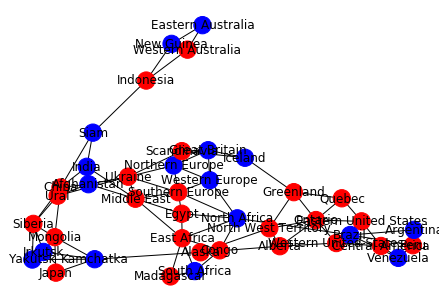

Adding 1 to Argentina!
Adding 1 to Irkutsk!
Adding 1 to Eastern Australia!
Adding 1 to Western Europe!
Adding 1 to India!
('India', ['Middle East', 'China'])
('India', 'Middle East')
Team blue declares attack on Team red from India to Middle East
Attacking_dice:  [6]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Irkutsk', ['Siberia', 'Mongolia'])
('Irkutsk', 'Mongolia')
Team blue declares attack on Team red from Irkutsk to Mongolia
Attacking_dice:  [4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Argentina', ['Peru'])
('Argentina', 'Peru')
Team blue declares attack on Team red from Argentina to Peru
Attacking_dice:  [3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Eastern Australia', ['Western Australia'])


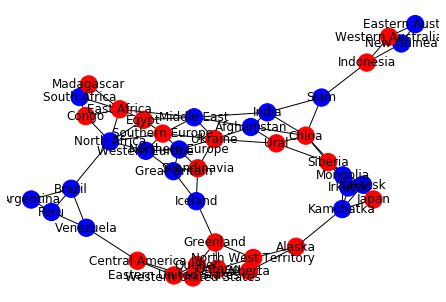

Adding 7 to Southern Europe!
('Southern Europe', 'Northern Europe')
Team red declares attack on Team blue from Southern Europe to Northern Europe
Attacking_dice:  [6, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Northern Europe', 'Great Britain')
Team red declares attack on Team blue from Northern Europe to Great Britain
Attacking_dice:  [6, 5, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Great Britain', 'Iceland')
Team red declares attack on Team blue from Great Britain to Iceland
Attacking_dice:  [5, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  5
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0


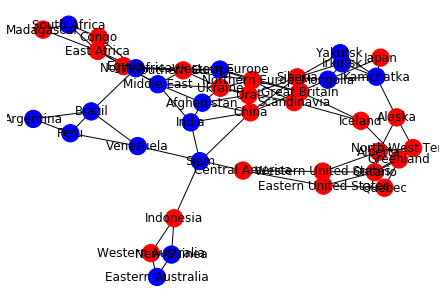

Adding 1 to India!
Adding 1 to Peru!
Adding 1 to Argentina!
Adding 1 to Siam!
Adding 1 to Eastern Australia!
('India', ['China'])
('India', 'China')
Team blue declares attack on Team red from India to China
Attacking_dice:  [2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Siam', ['Indonesia'])
('Siam', 'Indonesia')
Team blue declares attack on Team red from Siam to Indonesia
Attacking_dice:  [6]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Western Europe', ['Great Britain', 'Northern Europe', 'Southern Europe'])
('Western Europe', 'Southern Europe')
Team blue declares attack on Team red from Western Europe to Southern Europe
Attacking_dice:  [1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Eastern Australia', ['Western Australia'])


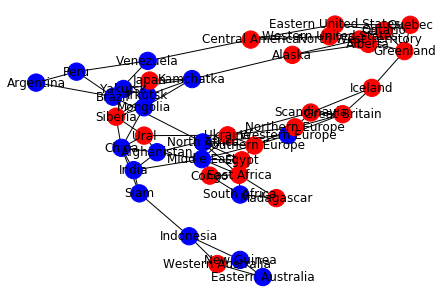

Adding 7 to Siberia!
('Siberia', 'Yakutsk')
Team red declares attack on Team blue from Siberia to Yakutsk
Attacking_dice:  [5, 4, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  8
Defending Troops Left:  0
('Yakutsk', 'Kamchatka')
Team red declares attack on Team blue from Yakutsk to Kamchatka
Attacking_dice:  [6, 5, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('Kamchatka', 'Mongolia')
Team red declares attack on Team blue from Kamchatka to Mongolia
Attacking_dice:  [6, 3, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0
('Mongolia', 'China')
Team red declares attack on Team blue from Mongolia to China
Attacking_dice:  [6, 3, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('China', 'Siam')
Team red declares attack on Team blue from China to Siam
Attacking_dice:  [6, 4, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
('Siam', 'Indone

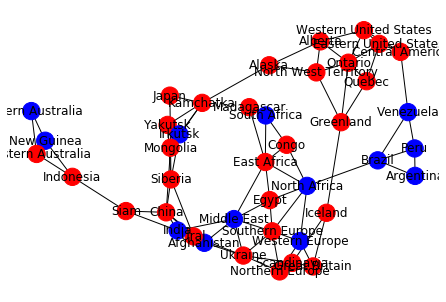

Adding 1 to Brazil!
Adding 1 to Eastern Australia!
Adding 1 to North Africa!
Adding 1 to North Africa!
('Eastern Australia', ['Western Australia'])
('Eastern Australia', 'Western Australia')
Team blue declares attack on Team red from Eastern Australia to Western Australia
Attacking_dice:  [6, 3, 2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  4
Defending Troops Left:  0
('North Africa', ['Southern Europe', 'Egypt', 'East Africa', 'Congo'])
('North Africa', 'East Africa')
Team blue declares attack on Team red from North Africa to East Africa
Attacking_dice:  [6, 5]
Defending_dice:  [6]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [5]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Western Australia', ['Indonesia'])


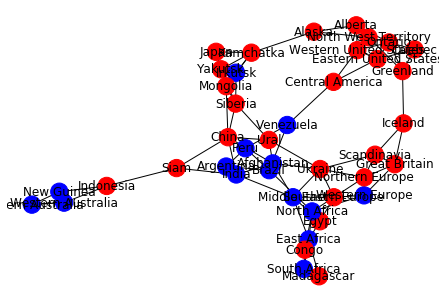

Adding 9 to Congo!
('Congo', 'East Africa')
Team red declares attack on Team blue from Congo to East Africa
Attacking_dice:  [5, 3, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('East Africa', 'Middle East')
Team red declares attack on Team blue from East Africa to Middle East
Attacking_dice:  [6, 5, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Middle East', 'India')
Team red declares attack on Team blue from Middle East to India
Attacking_dice:  [4, 2, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [4, 2, 1]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  7
Defending Troops Left:  0
('India', 'Afghanistan')
Team red declares attack on Team blue from India to Afghanistan
Attacking_dice:  [6, 5, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  6
Defending Troops Left:  0


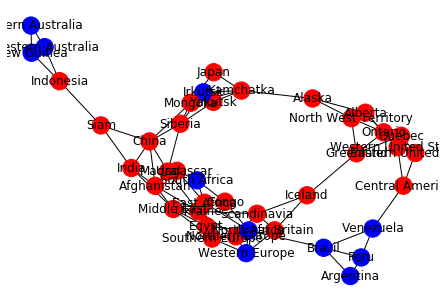

Adding 1 to Western Australia!
Adding 1 to New Guinea!
Adding 1 to Western Australia!
('Western Australia', ['Indonesia'])
('Western Australia', 'Indonesia')
Team blue declares attack on Team red from Western Australia to Indonesia
Attacking_dice:  [4, 3, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  5
Defending Troops Left:  0
('Indonesia', ['Siam'])
('Indonesia', 'Siam')
Team blue declares attack on Team red from Indonesia to Siam
Attacking_dice:  [6, 5, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [5, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Siam', ['China', 'India'])


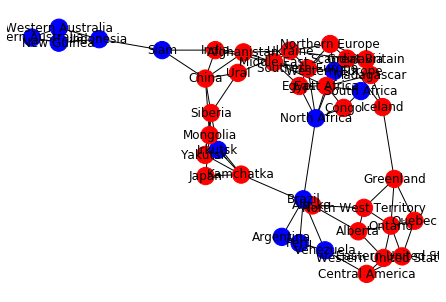

Adding 9 to Congo!
('Congo', 'North Africa')
Team red declares attack on Team blue from Congo to North Africa
Attacking_dice:  [6, 5, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('North Africa', 'Western Europe')
Team red declares attack on Team blue from North Africa to Western Europe
Attacking_dice:  [4, 3, 2]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0


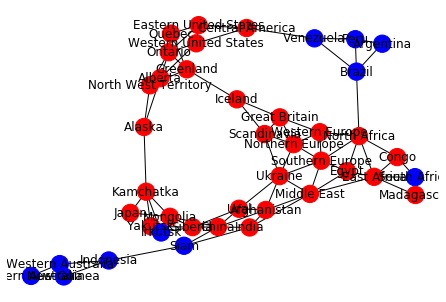

Adding 1 to Argentina!
Adding 1 to Argentina!
Adding 1 to South Africa!
('Siam', ['China', 'India'])
('Siam', 'China')
Team blue declares attack on Team red from Siam to China
Attacking_dice:  [3]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Brazil', ['North Africa'])
('Brazil', 'North Africa')
Team blue declares attack on Team red from Brazil to North Africa
Attacking_dice:  [4]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('South Africa', ['East Africa', 'Congo', 'Madagascar'])


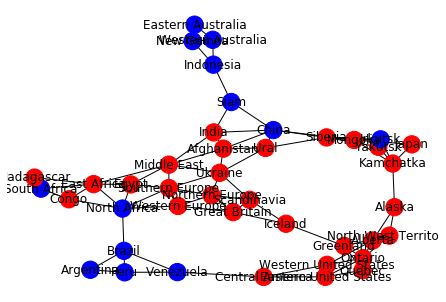

Adding 9 to Afghanistan!
('Afghanistan', 'China')
Team red declares attack on Team blue from Afghanistan to China
Attacking_dice:  [6, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  13
Defending Troops Left:  1
Attacking_dice:  [6, 4, 1]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0
('China', 'Siam')
Team red declares attack on Team blue from China to Siam
Attacking_dice:  [5, 4, 2]
Defending_dice:  [5]
[False]
Attacking Troops Left:  11
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [6]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [4, 3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [6, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Western Europe', 'North Africa')
Team red declares attack on Team blue from Western Europe to North Africa
Attacking_dice:  [4, 2, 1]
Defending_dice:  [1]
[ 

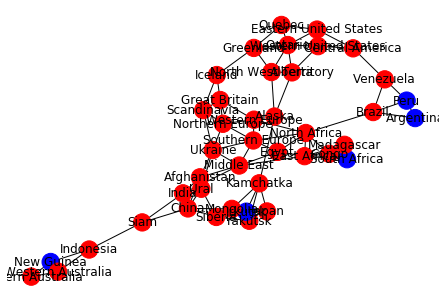

Adding 1 to Peru!
Adding 1 to New Guinea!
Adding 1 to Irkutsk!
('New Guinea', ['Indonesia', 'Western Australia', 'Eastern Australia'])
('New Guinea', 'Western Australia')
Team blue declares attack on Team red from New Guinea to Western Australia
Attacking_dice:  [6, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('South Africa', ['East Africa', 'Congo', 'Madagascar'])
('South Africa', 'East Africa')
Team blue declares attack on Team red from South Africa to East Africa
Attacking_dice:  [1]
Defending_dice:  [1]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Western Australia', ['Indonesia', 'Eastern Australia'])
('Western Australia', 'Eastern Australia')
Team blue declares attack on Team red from Western Australia to Eastern Australia
Attacking_dice:  [2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0
('Argentina', ['Brazil'])


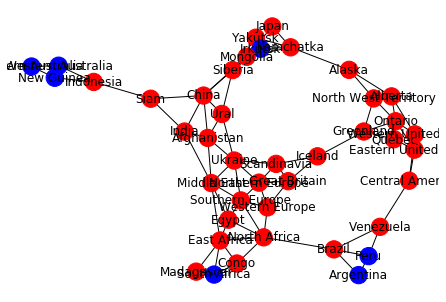

Adding 11 to Indonesia!
('Indonesia', 'New Guinea')
Team red declares attack on Team blue from Indonesia to New Guinea
Attacking_dice:  [4, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('New Guinea', 'Western Australia')
Team red declares attack on Team blue from New Guinea to Western Australia
Attacking_dice:  [4, 3, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Western Australia', 'Eastern Australia')
Team red declares attack on Team blue from Western Australia to Eastern Australia
Attacking_dice:  [5, 4, 1]
Defending_dice:  [6]
[False]
Attacking Troops Left:  8
Defending Troops Left:  1
Attacking_dice:  [4, 3, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [6, 4, 3]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  7
Defending Troops Lef

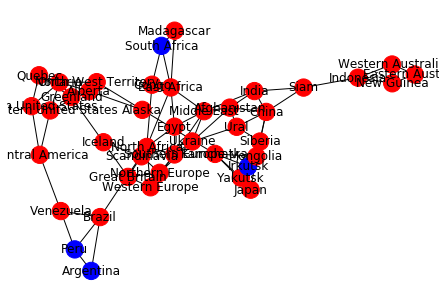

Adding 1 to Peru!
Adding 1 to Irkutsk!
Adding 1 to Peru!
('Irkutsk', ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'])
('Irkutsk', 'Mongolia')
Team blue declares attack on Team red from Irkutsk to Mongolia
Attacking_dice:  [5, 3]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Argentina', ['Brazil'])
('Argentina', 'Brazil')
Team blue declares attack on Team red from Argentina to Brazil
Attacking_dice:  [4, 3, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  3
Defending Troops Left:  1
Attacking_dice:  [6, 4]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  3
Defending Troops Left:  0
('Peru', ['Venezuela'])


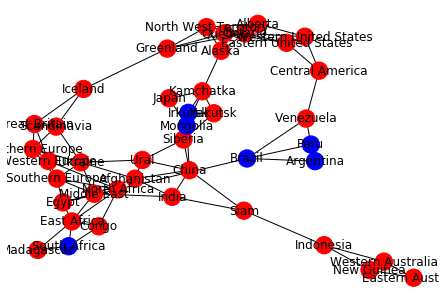

Adding 12 to Siberia!
('Siberia', 'Irkutsk')
Team red declares attack on Team blue from Siberia to Irkutsk
Attacking_dice:  [6, 4, 1]
Defending_dice:  [4]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0
('Irkutsk', 'Mongolia')
Team red declares attack on Team blue from Irkutsk to Mongolia
Attacking_dice:  [6, 5, 1]
Defending_dice:  [5, 1]
[ True  True]
Attacking Troops Left:  12
Defending Troops Left:  0


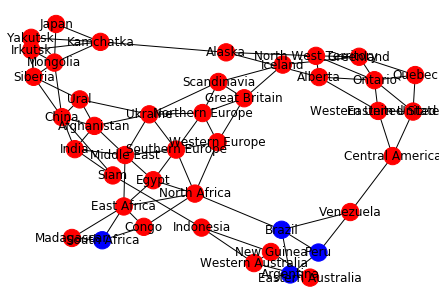

Adding 1 to South Africa!
Adding 1 to Peru!
Adding 1 to Brazil!
('South Africa', ['East Africa', 'Congo', 'Madagascar'])
('South Africa', 'East Africa')
Team blue declares attack on Team red from South Africa to East Africa
Attacking_dice:  [4]
Defending_dice:  [5]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1
('Brazil', ['Venezuela', 'North Africa'])
('Brazil', 'Venezuela')
Team blue declares attack on Team red from Brazil to Venezuela
Attacking_dice:  [2, 1]
Defending_dice:  [5]
[False]
Attacking Troops Left:  2
Defending Troops Left:  1
Attacking_dice:  [2]
Defending_dice:  [1]
[ True]
Attacking Troops Left:  2
Defending Troops Left:  0


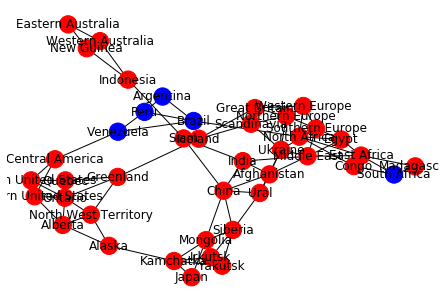

Adding 12 to Madagascar!
('Madagascar', 'South Africa')
Team red declares attack on Team blue from Madagascar to South Africa
Attacking_dice:  [4, 3, 2]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  13
Defending Troops Left:  0


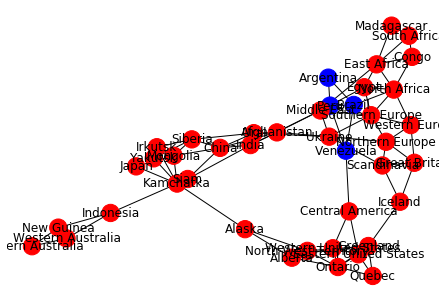

Adding 1 to Argentina!
Adding 1 to Peru!
Adding 1 to Venezuela!
('Venezuela', ['Central America'])
('Venezuela', 'Central America')
Team blue declares attack on Team red from Venezuela to Central America
Attacking_dice:  [1]
Defending_dice:  [4]
[False]
Attacking Troops Left:  1
Defending Troops Left:  1


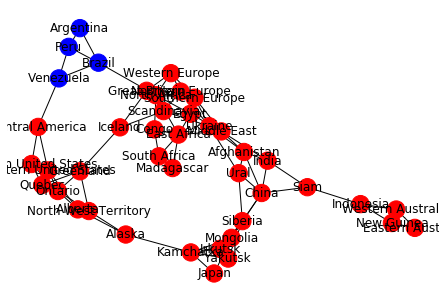

Adding 12 to Central America!
('Central America', 'Venezuela')
Team red declares attack on Team blue from Central America to Venezuela
Attacking_dice:  [5, 4, 3]
Defending_dice:  [5]
[False]
Attacking Troops Left:  12
Defending Troops Left:  1
Attacking_dice:  [4, 3, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  12
Defending Troops Left:  0
('Venezuela', 'Brazil')
Team red declares attack on Team blue from Venezuela to Brazil
Attacking_dice:  [6, 4, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  10
Defending Troops Left:  1
Attacking_dice:  [5, 3, 2]
Defending_dice:  [6]
[False]
Attacking Troops Left:  9
Defending Troops Left:  1
Attacking_dice:  [6, 5, 4]
Defending_dice:  [3]
[ True]
Attacking Troops Left:  9
Defending Troops Left:  0
('Brazil', 'Argentina')
Team red declares attack on Team blue from Brazil to Argentina
Attacking_dice:  [5, 4, 1]
Defending_dice:  [6, 1]
[False  True]
Attacking Troops Left:  7
Defending Troops Left:  1
Attacking_dice:  [6, 4, 2]
Defe

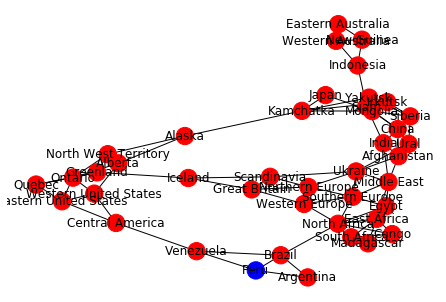

Adding 1 to Peru!
Adding 1 to Peru!
Adding 1 to Peru!
('Peru', ['Venezuela', 'Brazil', 'Argentina'])
('Peru', 'Brazil')
Team blue declares attack on Team red from Peru to Brazil
Attacking_dice:  [6, 5, 2]
Defending_dice:  [5]
[ True]
Attacking Troops Left:  10
Defending Troops Left:  0
('Brazil', ['Venezuela', 'Argentina', 'North Africa'])


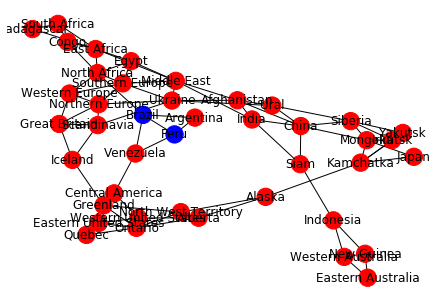

Adding 13 to Argentina!
('Argentina', 'Peru')
Team red declares attack on Team blue from Argentina to Peru
Attacking_dice:  [5, 2, 1]
Defending_dice:  [2]
[ True]
Attacking Troops Left:  19
Defending Troops Left:  0
('Peru', 'Brazil')
Team red declares attack on Team blue from Peru to Brazil
Attacking_dice:  [4, 2, 1]
Defending_dice:  [6, 3]
[False False]
Attacking Troops Left:  16
Defending Troops Left:  9
Attacking_dice:  [6, 4, 2]
Defending_dice:  [5, 4]
[ True False]
Attacking Troops Left:  15
Defending Troops Left:  8
Attacking_dice:  [4, 3, 2]
Defending_dice:  [4, 1]
[False  True]
Attacking Troops Left:  14
Defending Troops Left:  7
Attacking_dice:  [4, 2, 1]
Defending_dice:  [4, 3]
[False False]
Attacking Troops Left:  12
Defending Troops Left:  7
Attacking_dice:  [6, 4, 2]
Defending_dice:  [5, 1]
[ True  True]
Attacking Troops Left:  12
Defending Troops Left:  5
Attacking_dice:  [6, 5, 3]
Defending_dice:  [2, 1]
[ True  True]
Attacking Troops Left:  12
Defending Troops Left:  3

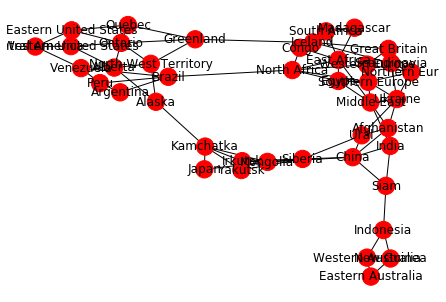

red team has won in 10 turns


In [9]:
curr_team = teams[0]
defending_team = teams[1]
counter = 0
while defending_team.hasTeamWon() == False:
    curr_team.playTurn()
    curr_team_temp = curr_team
    curr_team = defending_team
    defending_team = curr_team_temp
    color_map = risk_map.getTeamColorMap()
    nx.draw(risk_map.graph, node_color = color_map, with_labels=True)
    plt.show()
    counter += 1
    
print("{defender} team has won in {num_turns} turns".format(defender = defending_team.getName(), num_turns = counter//2))
    
    
    

In [10]:
import networkx as nx

In [11]:
#